<a href="https://colab.research.google.com/github/praneethamalakapalli/jdoodle/blob/main/digg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(X_train[10])



[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


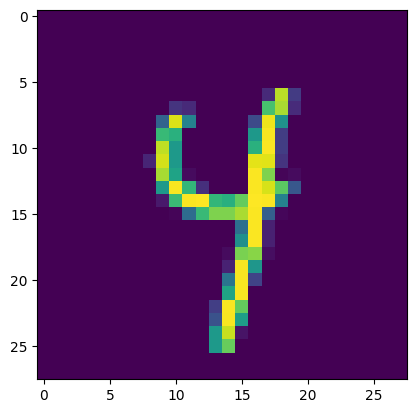

4


In [ ]:
plt.imshow(X_train[26])
plt.show()
print(Y_train[26])

In [ ]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [ ]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
model=keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(50,activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')

])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )


In [ ]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3009 - accuracy: 0.9134
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1411 - accuracy: 0.9582
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1018 - accuracy: 0.9686
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0830 - accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0680 - accuracy: 0.9794
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0588 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0524 - accuracy: 0.9828
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0460 - accuracy: 0.9852
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0350 - accuracy: 0.9886


In [ ]:
model.fit(X_test,Y_test,epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0988 - accuracy: 0.9714
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0401 - accuracy: 0.9868
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0230 - accuracy: 0.9932
Epoch 4/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0138 - accuracy: 0.9968
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0074 - accuracy: 0.9991
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0058 - accuracy: 0.9992
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0044 - accuracy: 0.9995
Epoch 8/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0033 - accuracy: 0.9996
Epoch 9/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0025 - accuracy: 0.9999
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0016 - accuracy: 1.0000

In [ ]:
loss,accuracy=model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0011 - accuracy: 1.0000


In [ ]:
print(X_test.shape)

(10000, 28, 28)


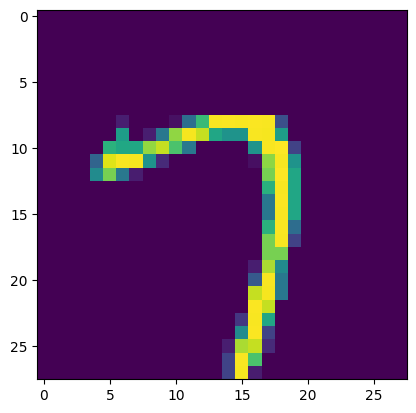

In [ ]:
plt.imshow(X_test[26])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
y_pred=model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
y_pred.shape

(10000, 10)

prediction  probablity for each dataset

In [ ]:
#convert the prediction probablity to class label
label_for_first_test_image=np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
#convert the prediction probablites to  the  class label
Y_pred_labels=[np.argmax(i) for i in y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Confusion Matrix

In [ ]:
con=confusion_matrix(Y_test,Y_pred_labels)

In [ ]:
print(con)

tf.Tensor(
[[ 980    0    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0    1 1031    0    0    0    0    0    0    0]
 [   0    0    0 1010    0    0    0    0    0    0]
 [   0    0    0    0  982    0    0    0    0    0]
 [   0    0    0    0    0  892    0    0    0    0]
 [   0    0    1    0    0    0  957    0    0    0]
 [   0    0    0    0    0    0    0 1028    0    0]
 [   0    0    0    0    0    0    0    0  974    0]
 [   0    0    0    0    0    0    0    0    0 1009]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'predicted Labels')

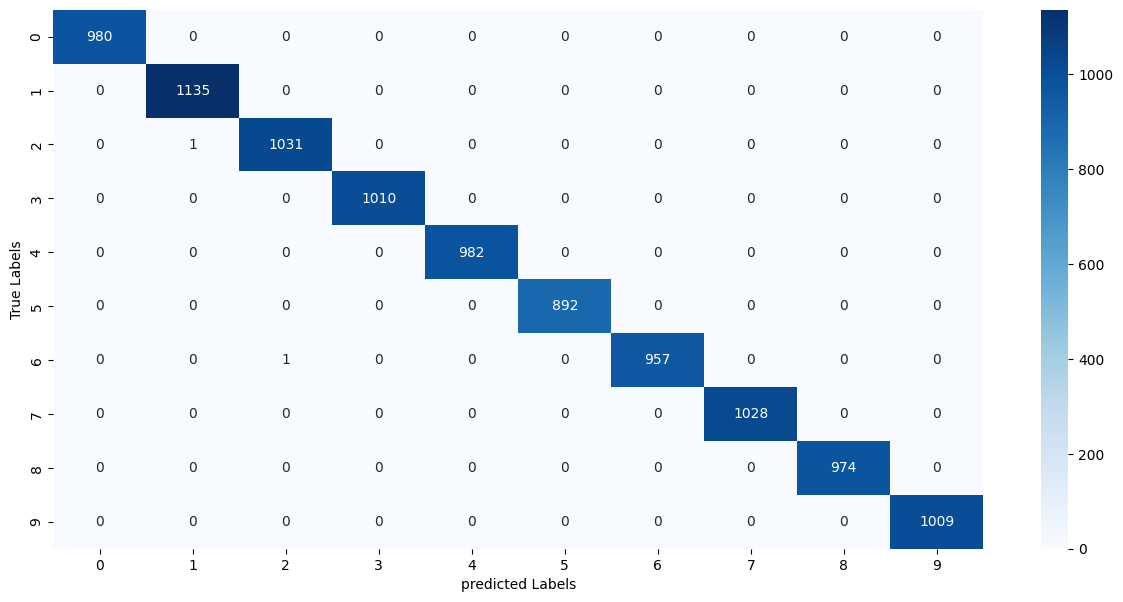

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(con,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('predicted Labels')

In [ ]:
#buliding a path
input_image_path='/content/mnist.jpg'


In [ ]:
input_image=cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[255 255 255]
  [250 250 250]
  [255 255 255]
  ...
  [240 240 240]
  [255 255 255]
  [239 239 239]]

 [[244 244 244]
  [247 247 247]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [240 240 240]]

 [[255 255 255]
  [253 253 253]
  [252 252 252]
  ...
  [245 245 245]
  [239 239 239]
  [243 243 243]]

 ...

 [[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [245 245 245]
  [245 245 245]
  [245 245 245]]

 [[244 244 244]
  [244 244 244]
  [244 244 244]
  ...
  [244 244 244]
  [244 244 244]
  [244 244 244]]

 [[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [245 245 245]
  [245 245 245]
  [245 245 245]]]


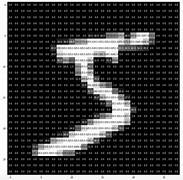

In [ ]:
cv2_imshow(input_image)


In [ ]:
input_image.shape

(180, 183, 3)

In [ ]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(180, 183)

In [ ]:
input_image_resize=cv2.resize(grayscale,(28,28))


In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)


In [ ]:
input_image_resize=input_image_resize/255


In [ ]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [ ]:
input_prediction=model.predict(image_reshaped)

1/1 [==============================] - 0s 42ms/step


In [ ]:
print(input_prediction)

[[7.2107209e-11 9.4844162e-01 6.9543886e-01 9.9190646e-01 1.6177196e-16
  9.9999386e-01 1.2431172e-09 1.0000000e+00 6.7608444e-06 1.1526947e-05]]


In [ ]:
input_pred_label=np.argmax(input_prediction)

In [ ]:
input_pred_label

7